# Exercise 2: Data Processing and Analysis

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    import otter
    grader = otter.Notebook()
except:
    %pip install otter-grader
    import otter
    grader = otter.Notebook()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 52.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 27.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [3]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [4]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [5]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = smartwatch['Heart Rate (BPM)'].max()

In [8]:
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [9]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

len(outlierHeartRaterows) + len(nullHeartRaterows)

450

In [10]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]

heartrateRows

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
5,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
6,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Seddentary,2
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [18]:
HeartRateMean = heartrateRows['Heart Rate (BPM)'].mean()
HeartRateMean


np.float64(75.13268404820141)

In [19]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


outlierHeartRaterows

/tmp/ipykernel_1555/2138589342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_1555/2138589342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,ERROR,Highly Active,5
337,2369.0,75.132684,95.441773,2998.761919,6.670622263019579,Highly Active,9
393,2443.0,75.132684,95.497181,1227.804688,5.185244686595328,Highly_Active,9
403,3200.0,75.132684,96.011492,9402.746140,7.190062873693008,Highly_Active,9
595,2129.0,75.132684,97.161853,2555.402184,5.928628388578222,Highly Active,7
649,2008.0,75.132684,98.356789,2739.171166,7.272009723254014,Highly_Active,NaN
818,3156.0,75.132684,NaN,7281.778831,4.300171191258864,Sedentary,3
1195,3261.0,75.132684,99.652006,2867.872064,7.218530947169898,Active,7
1391,4621.0,75.132684,96.688083,20577.677290,8.049854248644627,Active,3
1602,4737.0,75.132684,95.095839,16072.283561,6.98847026102848,Actve,6


In [20]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = smartwatch_hr['Heart Rate (BPM)'].mean()
fullTableHRMean

np.float64(75.13268404820141)

In [21]:
grader.check('q2')

Question 2 results: All test cases passed!

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

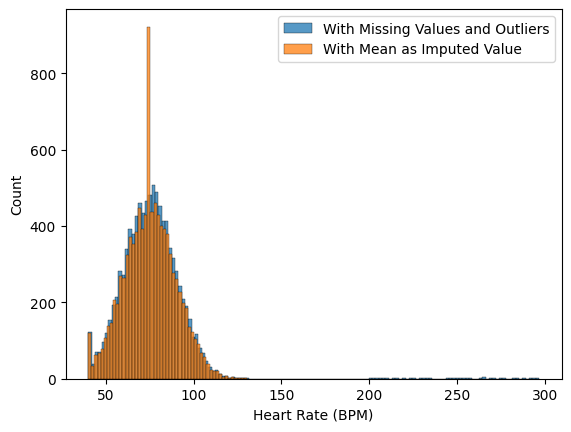

In [22]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

The median becomes slightly lower with the imputation.

...

In [23]:
## coding cell to check the difference in median values 

OGMedian = smartwatch['Heart Rate (BPM)'].median()
NewMedian = smartwatch_hr['Heart Rate (BPM)'].median()
OGMedian, NewMedian


(np.float64(75.22060125775644), np.float64(75.13268404820141))

Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [24]:
minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()

maxBloodO2 = smartwatch['Blood Oxygen Level (%)'].max()

meanBloodO2 = smartwatch['Blood Oxygen Level (%)'].mean()

minBloodO2, maxBloodO2, meanBloodO2

(np.float64(90.79120814564097),
 np.float64(100.0),
 np.float64(97.84158102099076))

In [28]:
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

In [31]:
smartwatch.columns

Index(['User ID', 'Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count',
       'Sleep Duration (hours)', 'Activity Level', 'Stress Level'],
      dtype='object')

<Axes: ylabel='Blood Oxygen Level (%)'>

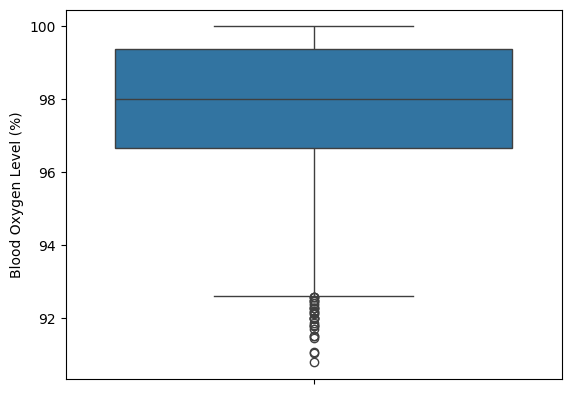

In [32]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

The difference between the maximum, minimum, and the mean is not overly large so as to skew the data in any one direction. While the boxplot looks slihgtly skewed with the lower values, these are stillvalid measurements and are not out of the realm of possibility and therefore should be counted.

....

In [35]:
## use this space or additional cells to deal with the missing/outlier values. 

nullBloodO2 = smartwatch[smartwatch['Blood Oxygen Level (%)'].isnull()]

len(nullBloodO2)

nullBloodO2 = meanBloodO2


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [36]:
minSteps = smartwatch['Step Count'].min()

maxSteps = smartwatch['Step Count'].max()

meanSteps = smartwatch['Step Count'].mean()

minSteps, maxSteps, meanSteps

(np.float64(0.9101380609604088),
 np.float64(62486.690753464914),
 np.float64(6985.685884992229))

In [37]:
grader.check('q6')

Question 6 results: All test cases passed!

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

The difference between the mean and minimum number of steps is both very large and the minimum number of steps is not a possible value. In this realm, I would delete all rows who have step counts of less than 500 and set them equal to the average.

....

In [43]:
nullSteps

np.float64(6985.685884992229)

In [44]:
## use this space or additional cells to address the missing or outlier data. 
nullSteps = smartwatch[smartwatch['Step Count'].isnull()]
len(nullSteps)
nullSteps['Step Count'] = meanSteps
outlierSteps = smartwatch[smartwatch['Step Count'] < 500]
len(outlierSteps)
outlierSteps['Step Count'] = meanSteps
allSteps = smartwatch[(~smartwatch['Step Count'].isnull()) & (smartwatch['Step Count'] <= 500)]
allSteps


smartwatch_steps = pd.concat([nullSteps, outlierSteps, allSteps])

/tmp/ipykernel_1555/3163455560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSteps['Step Count'] = meanSteps
/tmp/ipykernel_1555/3163455560.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierSteps['Step Count'] = meanSteps


Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [45]:
minSleep = smartwatch['Sleep Duration (hours)'].min()

minSleep

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [48]:
for num in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(num)  ## first try to see if it can be converted to a number
    except:
        print(num)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [47]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
1456,2997.0,54.116580,95.631824,6985.685885,ERROR,Active,1
4349,2677.0,73.357223,95.335209,6985.685885,ERROR,Sedentary,1
6992,2105.0,97.477048,94.138582,6985.685885,ERROR,Seddentary,7
8642,3476.0,NaN,99.462778,6985.685885,ERROR,Active,3
674,4251.0,82.097114,96.201605,6985.685885,ERROR,Actve,6
1262,4465.0,NaN,97.113032,6985.685885,ERROR,Highly_Active,6
1569,1050.0,104.710998,97.435357,6985.685885,ERROR,Active,9
2095,2998.0,83.432142,98.526244,6985.685885,ERROR,Actve,8
2126,4932.0,76.800011,98.333915,6985.685885,ERROR,Seddentary,5
2918,3989.0,100.173548,96.070934,6985.685885,ERROR,Seddentary,5


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [49]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_1555/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
1456,2997.0,54.116580,95.631824,6985.685885,NaN,Active,1
4349,2677.0,73.357223,95.335209,6985.685885,NaN,Sedentary,1
6992,2105.0,97.477048,94.138582,6985.685885,NaN,Seddentary,7
8642,3476.0,NaN,99.462778,6985.685885,NaN,Active,3
674,4251.0,82.097114,96.201605,6985.685885,NaN,Actve,6
1262,4465.0,NaN,97.113032,6985.685885,NaN,Highly_Active,6
1569,1050.0,104.710998,97.435357,6985.685885,NaN,Active,9
2095,2998.0,83.432142,98.526244,6985.685885,NaN,Actve,8
2126,4932.0,76.800011,98.333915,6985.685885,NaN,Seddentary,5
2918,3989.0,100.173548,96.070934,6985.685885,NaN,Seddentary,5


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [50]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
136,4928.0,70.593014,97.473981,6985.685885,3.439288,Highly_Active,6
204,2923.0,NaN,98.710637,6985.685885,5.756959,Highly_Active,8
603,2081.0,69.084103,99.627473,6985.685885,6.358185,Highly_Active,7
716,2630.0,83.258294,98.704757,6985.685885,5.486241,Seddentary,3
739,2649.0,97.506420,97.651407,6985.685885,7.465981,Active,6
...,...,...,...,...,...,...,...
9948,1842.0,78.255290,97.277616,90.852423,10.104963,Actve,3
9971,1434.0,NaN,99.319841,26.215769,6.367659,Active,10
9972,1881.0,74.755744,93.445342,164.026524,8.052268,Highly Active,2
9979,3631.0,58.797407,NaN,359.210435,8.035880,Active,5


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [53]:
minSleep = smartwatch_sleep['Sleep Duration (hours)'].min()
maxSleep = smartwatch_sleep['Sleep Duration (hours)'].max()
meanSleep = smartwatch_sleep['Sleep Duration (hours)'].mean()

minSleep, maxSleep, meanSleep

(np.float64(2.494171838826327),
 np.float64(11.188196358432544),
 np.float64(6.437133233750759))

In [54]:
grader.check('q8')

Question 8 results:
    Question 8 - 1 result:
        ❌ Test case failed
        Trying:
            bool(minSleep == -0.1944527906201543)
        Expecting:
            True
        **********************************************************************
        Line 3, in Question 8 0
        Failed example:
            bool(minSleep == -0.1944527906201543)
        Expected:
            True
        Got:
            False
        Trying:
            bool(maxSleep == 12.140232872862926)
        Expecting:
            True
        **********************************************************************
        Line 5, in Question 8 0
        Failed example:
            bool(maxSleep == 12.140232872862926)
        Expected:
            True
        Got:
            False
        Trying:
            bool(meanSleep ==  6.505462918406444)
        Expecting:
            True
        **********************************************************************
        Line 7, in Question 8 0
        Failed example:
            bool(meanSleep ==  6.505462918406444)
        Expected:
            True
        Got:
            False

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

I would not remove data unless it is null or less than zero. In these two cases I would replace the values with the mean as it is not possible to have negative sleep and while it is possible to have no sleep, smartwatch trackers often make mistakes in accounting for sleep as they use heartrate.

....

In [56]:
## use this space or additional cells to address the missing or outlier data. 
nullSleep = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'].isnull()]
nullSleep
nullSleep['Sleep Duration (hours)'] = meanSleep
smallSleep = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'] < 0]
smallSleep['Sleep Duration (hours)'] = meanSleep
allSleep = smartwatch_sleep[(~smartwatch_sleep['Sleep Duration (hours)'].isnull()) & (smartwatch_sleep['Sleep Duration (hours)'] <= 0)]


smartwatch_updated_sleep = pd.concat([nullSleep, allSleep, smallSleep])
smartwatch_updated_sleep

/tmp/ipykernel_1555/1399115720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSleep['Sleep Duration (hours)'] = meanSleep


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
1456,2997.0,54.116580,95.631824,6985.685885,6.437133,Active,1
4349,2677.0,73.357223,95.335209,6985.685885,6.437133,Sedentary,1
5177,2997.0,70.484333,97.615592,6985.685885,6.437133,Actve,1
6992,2105.0,97.477048,94.138582,6985.685885,6.437133,Seddentary,7
8642,3476.0,NaN,99.462778,6985.685885,6.437133,Active,3
...,...,...,...,...,...,...,...
8771,1244.0,71.003047,96.320455,447.976397,6.437133,Highly Active,8
9059,4293.0,55.847214,100.000000,466.724308,6.437133,Active,8
9072,3716.0,88.312927,100.000000,372.280516,6.437133,Actve,9
9413,3740.0,71.311586,100.000000,479.356677,6.437133,Highly Active,10


We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [ ]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

Very High


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

I would give each value on the scale a number, for example Very High would be 100, High would be 75, moderate would be 50, low would be 25, and very low would be 0.
...

In [64]:
smartwatch_sleep['Stress Level'].unique()

array(['6', '8', '7', '3', '2', '1', '4', '9', '10', 'Very High', '5',
       nan], dtype=object)

In [67]:
## cell to deal with 'Very High' value

high_stress = smartwatch_sleep[smartwatch_sleep['Stress Level'] == 'Very High']
other_stress = smartwatch_sleep[smartwatch_sleep['Stress Level'] != 'Very High']
high_stress['Stress Level'] = 15

smartwatch_stress = pd.concat([high_stress, other_stress])

smartwatch_stress


/tmp/ipykernel_1555/1548777907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_stress['Stress Level'] = 15


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2403,2980.0,86.049161,97.042221,6985.685885,6.045268,Highly Active,15
1945,4004.0,NaN,96.837078,6985.685885,8.292480,Active,15
2421,4380.0,96.907879,97.099425,6985.685885,NaN,Sedentary,15
6794,3690.0,72.904796,100.000000,6985.685885,7.626350,Highly_Active,15
1945,4004.0,NaN,96.837078,291.736435,8.292480,Active,15
...,...,...,...,...,...,...,...
9948,1842.0,78.255290,97.277616,90.852423,10.104963,Actve,3
9971,1434.0,NaN,99.319841,26.215769,6.367659,Active,10
9972,1881.0,74.755744,93.445342,164.026524,8.052268,Highly Active,2
9979,3631.0,58.797407,NaN,359.210435,8.035880,Active,5


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [61]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [68]:
## Highly Active 
highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly Active') | (smartwatch_stress['Activity Level'] == 'Highly_Active')]  ## Pull out rows for two unique values matching highly active
highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 


## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Active') | (smartwatch_stress['Activity Level'] == 'Actve')]
active['Activity Level'] = 'Active'
active['NumActivity'] = 2

## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Sedentary') | (smartwatch_stress['Activity Level'] == 'Seddentary')]
sedentary['Activity Level'] = 'Sedentary'
sedentary['NumActvity'] = 3

final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
final_table

/tmp/ipykernel_1555/1762597802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
/tmp/ipykernel_1555/1762597802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_1555/1762597802.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity,NumActvity
2403,2980.0,86.049161,97.042221,6985.685885,6.045268,Highly Active,15,1.0,NaN
6794,3690.0,72.904796,100.000000,6985.685885,7.626350,Highly Active,15,1.0,NaN
6794,3690.0,72.904796,100.000000,161.588757,7.626350,Highly Active,15,1.0,NaN
136,4928.0,70.593014,97.473981,6985.685885,3.439288,Highly Active,6,1.0,NaN
204,2923.0,NaN,98.710637,6985.685885,5.756959,Highly Active,8,1.0,NaN
...,...,...,...,...,...,...,...,...,...
7143,2194.0,84.195747,96.120535,471.459185,6.124899,NaN,9,NaN,NaN
8220,4148.0,62.984294,98.575948,208.017213,6.053551,NaN,8,NaN,NaN
8770,1648.0,85.164129,98.886065,253.654952,8.619445,NaN,7,NaN,NaN
9530,1573.0,88.008310,94.756364,389.308611,7.476206,NaN,1,NaN,NaN


Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [69]:
final_table.isnull().sum()

User ID                    28
Heart Rate (BPM)           58
Blood Oxygen Level (%)     37
Step Count                  0
Sleep Duration (hours)     65
Activity Level             25
Stress Level               26
NumActivity               480
NumActvity                963
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [70]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1418 entries, 2403 to 9718
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 1390 non-null   float64
 1   Heart Rate (BPM)        1360 non-null   float64
 2   Blood Oxygen Level (%)  1381 non-null   float64
 3   Step Count              1418 non-null   float64
 4   Sleep Duration (hours)  1353 non-null   float64
 5   Activity Level          1393 non-null   object 
 6   Stress Level            1392 non-null   object 
 7   NumActivity             938 non-null    float64
 8   NumActvity              455 non-null    float64
dtypes: float64(7), object(2)
memory usage: 110.8+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

When you chanfe the valye of the s parameter, it makes the size of the points smaller. Using the defualt size, the points create a blob but using a smaller value such a 10 or 1 makes the pattern more visible.

...

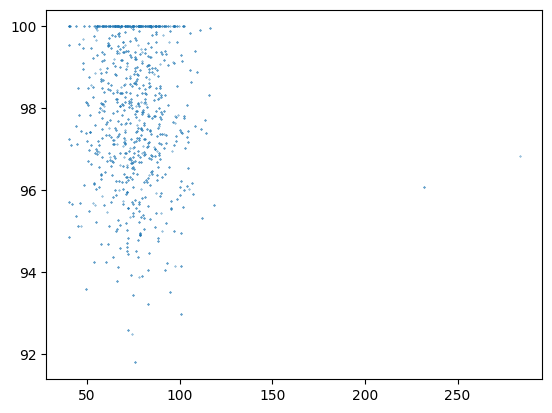

In [75]:
plt.scatter(final_table['Heart Rate (BPM)'], final_table['Blood Oxygen Level (%)'], s = 0.1)

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

When you leave the NaN values it creates a larger plot with a very different pattern and very different bounds. There are more points in general, but especially along the y=axis on the line y = 100

...

In [76]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

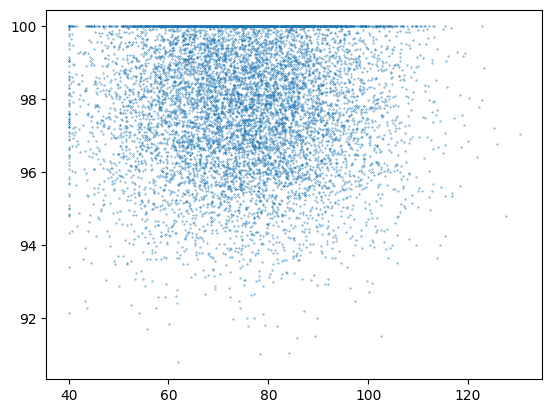

In [77]:
plt.scatter(nanTable['Heart Rate (BPM)'], nanTable['Blood Oxygen Level (%)'], s = 0.1)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

In [81]:
final_table

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity,NumActvity
2403,2980.0,86.049161,97.042221,6985.685885,6.045268,Highly Active,15,1.0,NaN
6794,3690.0,72.904796,100.000000,6985.685885,7.626350,Highly Active,15,1.0,NaN
6794,3690.0,72.904796,100.000000,161.588757,7.626350,Highly Active,15,1.0,NaN
136,4928.0,70.593014,97.473981,6985.685885,3.439288,Highly Active,6,1.0,NaN
204,2923.0,NaN,98.710637,6985.685885,5.756959,Highly Active,8,1.0,NaN
...,...,...,...,...,...,...,...,...,...
7143,2194.0,84.195747,96.120535,471.459185,6.124899,NaN,9,NaN,NaN
8220,4148.0,62.984294,98.575948,208.017213,6.053551,NaN,8,NaN,NaN
8770,1648.0,85.164129,98.886065,253.654952,8.619445,NaN,7,NaN,NaN
9530,1573.0,88.008310,94.756364,389.308611,7.476206,NaN,1,NaN,NaN


<Axes: xlabel='Activity Level', ylabel='Step Count'>

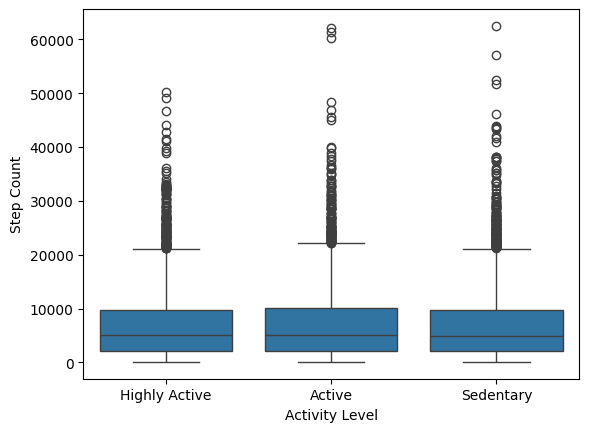

In [82]:
## Visualization 

sns.boxplot(data = nanTable, x = 'Activity Level', y = 'Step Count')


In [84]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = nanTable[nanTable['Activity Level'] == 'Sedentary']  ## sedentary rows
act = nanTable[nanTable['Activity Level'] == 'Active'] ## active rows
hact = nanTable[nanTable['Activity Level'] == 'Highly Active'] ## highly active rows 

stat, pval = f_oneway(sed['Step Count'].dropna(), act['Step Count'].dropna(), hact['Step Count'].dropna())


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.176, p-value: 0.838


Is there significant difference between the groups' step counts?  

There is not a significant difference between the groups step counts as the p value is not statistically significant.

...

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

One of the best ways to communicate this data to a wider audience is to use the means if there are extremem outliers, but otherwise use the full range of values. While it could be beneficial to have some demographic information to further understand the representativeness of the values, this can run into other issues. For example, gendered and racialised demographics can reinforce biases.

If I was to present this data to a broader audience I would emphasise the means in regards to step count and oxygen level, especially around how the step counts of the three different groups did not meaningfuly change. I would use almost the full range of values for sleep (getting rid of number below 0) to emphasise the general lack of people invovled in the study reaching reccommended amounts of sleep. Further, I would not talk about the stress level as they numbers are not easy to  understand by a lay person. Lastly, I would talk about heart rate and its relation to actiity level and how step count alone is not an adequate measurement of activity level for this reason.